# Projet Maths/Info Laperrouze/Arguelle

Avant toute chose, on importe les modules dont on aura besoin.

In [ ]:
import numpy as np
import autograd
import matplotlib.pyplot as plt
%matplotlib inline

## Amorce
### Approche par la méthode de Newton

Si on pose $g : t --> f(0,t)$ définie sur $[0;1]$. 
Avec l'hypothèse de f continûment différentiable, on obtient que $g$ est $C^1$, Donc avec le théorème des valeurs intermédiaires appliquées à $g$, il semble raisonnable de fixer $f(0;0)<c<f(0;1)$ pour être certain d'obtenir t appartenant à $[0;1]$ tel que $f(0;t)=c$.

On choisit la **méthode de Newton** corrigée par $c$ pour trouver le de la fonction auxiliaire $h=g-c$. On obtient donc un $0$ correspondant (ou pas).

Pour dériver la fonction, on utilise le module **autograd**. 

In [ ]:
def find_seedNew(g, x0=0, c=0, eps=2**(-26)):
    maxi=max(g(x0,1.0), g(x0,0.0))
    mini=min(g(x0,1.0), g(x0,0.0))
    
    if (c<mini) and (c>maxi):
        return None 
        
    t=1.0

    while abs(g(x0,t)-c)>eps:
        t= t - (g(x0,t)/deriv(g,x0, t))
    return t



def deriv(f,x,y):
    g=autograd.grad(f,1)
    return g(x,y)

On teste cette fonction pour une fonction simple:

$$ f(x,y)=x^2+y^ 2$$

On s'attend à trouver $y=0$.

In [28]:
def f(x,y):
    return x**2+y**2

find_seedNew(f)

2.9802322387695312e-08

On remarque que la valeur est bien $y=0$. 

### Approche par dichotomie

Avec les mêmes hypothèses de continuiété, on peut également utiliser **la méthode par dichtomie** pour trouver le $0$ de la fonction. Cette approche est plus naïve mais sera utile par la suite. 

In [62]:
def find_seedDich(g, x0=0, c=1, eps=2**(-26)):

    maxi=max(g(x0,1), g(x0,0))
    mini=min(g(x0,1), g(x0,0))
    if c>maxi or c<mini:
        print(maxi, mini)
        return None
    a=0
    b=1
    d=(a+b)/2
    while abs(b-a)> eps:
        if (g(x0,a)-c)*(g(x0,d)-c)>=0:
            a=d
        else:
            b=d
        d=(a+b)/2
    return d

<p>Cette fois-ci on cherche la solution de $$f(x,y)=1$$ quand $x=0$ <p>
On utilise la même fonction que ci-dessus:

In [63]:
find_seedDich(f)

0.9999999925494194

On trouve bien $y=1$, qui est la seule solution à l'équation $\in[0,1]$.

## Propagation 
### Première approche


<p> L'idée est de parcourir l'un des cotés de notre carré et de relever un point de la ligne de niveau à chaque "arret" sur ce coté, arrêts espacés de delta. Pour ce faire on créer une liste de valeurs pour la première coordonnée $x$ espacés de $\delta$. Il faut donc  modifier nos fonctions ci-dessus pour se déplacer librement sur la première coordonnée de f sans rester bloqué sur 0. <p>
    
Dans un premier temps, on ne se préocuppe pas d'avoir seulement un $\delta$ d'écart entre 2 valeurs de $y$. Si on ne ne trouve pas de valeur de $y$ pour $x+\delta$, on s'arrête. 

In [46]:
def simple_contour(f,y0=0.0, c=1, delta=0.01):
    X=np.arange(0,1, delta)
    Y=[]

    for x0 in X:
        if y0!=None and y0<=1 and y0>=0:
            y0=find_seedDich(f,x0)
            Y.append(y0)

        else:
            plt.plot(X[:(len(Y))],Y)
            plt.show()
            return X,Y

    plt.plot(X, Y)
    plt.show()

    return X,Y

On essaie pour la fonction $f=x^2+y^2$ définie précédemment.

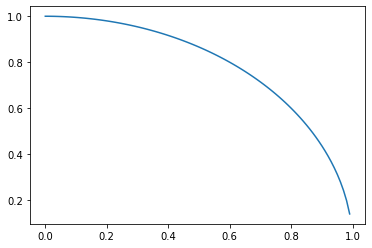

(array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
        0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
        0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
        0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
        0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
        0.99]),
 [0.9999999925494194,
  0.999949999153614,
  0.9997999742627144,
  0.9995499029755592,
  0.9991996809840202,
  0.9987492188811302,
  0.9981983825564384,
  0.9975469931960106,
  0.9967948570847511,
  0.9959417656064034,
  0.9949874356389046,
  0.9939315840601921,
  0.9927738979458809,
  0.9915139898657799,
  0.9901515

In [47]:
simple_contour(f)

On obtient bien un quart de cercle. On aurait aussi pu utiliser la méthode de Newton pour ce problème.

### Deuxième approche

On essaie maitenant d'avoie un $\delta$ d'écart pour les différentes valeurs de $x$ mais aussi de $y$. Encore une fois, on peut utiliser la dichotomie ou bien la méthode de Newton pour trouver une solution de l'équation $f(x,y)=c$ . On ajoute donc 1 nouveaux paramètres *valmax* , qui permettraient de ne rechercher qu'un $y$ dans un voisinage proche de la dernière solution trouvée. ]. Ceci permet de palier au problème rencontré si notre ligne de niveau fait un "lacet", ce qui engendrerait deux valeurs possibles de $y$ pour un même $x$. Dans ce cas, nos tableaux n'auraient pas forcément présenté de continuité sur la ligne de niveau.

<p> On commence par Newton:

In [ ]:
def find_seed3Dich(x, y ,g, valmax, valmin, c=0, eps=2**(-26)):

    max=max(g(x,valmin), g(x,valmax))
    min=min(g(x,valmin), g(x,valmax))

    if c>max or c<min:
        return None
    while abs(g(x,y)-c)>eps:

    if y>valmax or y<valmin:
        return None

        y= y - (g(x,y)/deriv(g,x,y))

    return y

Puis la dichotomie:

In [ ]:
def find_seed2Dich(x, y ,g, valmax, valmin, c=0, eps=2**(-26)):

    max=max(g(x,valmin), g(x,valmax))
    min=min(g(x,valmin), g(x,valmax))

    if c>max or c<min:
        return None

    a=valmax
    b=valmin
    d=(a+b)/2
    while abs(b-a)> eps:
        if (g(x0,a)-c)*(g(x0,d)-c)>=0:
            a=d
        else:
            b=d
        d=(a+b)/2
    return d

La nouvelle fonction *contour* devient:

In [ ]:
def simple_contour2New(f,y0=0.0, c=1, delta=0.01):
    X=np.arange(0,1, delta)
    Y=[]

    for x0 in X:
        if y0!=None and y0<=1 and y0>=0:
            y0=find_seed2New(f,x0, y0+delta,y0-delta)
            Y.append(y0)

        else:
            plt.plot(X[:(len(Y))],Y)
            plt.show()
            return X,Y

    plt.plot(X, Y)
    plt.show()

    return X,Y

Ou bien:

In [ ]:
def simple_contour2New(f,y0=0.0, c=1, delta=0.01):
    X=np.arange(0,1, delta)
    Y=[]

    for x0 in X:
        if y0!=None and y0<=1 and y0>=0:
            y0=find_seed2Dich(f,x0,y0+delta,y0-delta)
            Y.append(y0)

        else:
            plt.plot(X[:(len(Y))],Y)
            plt.show()
            return X,Y

    plt.plot(X, Y)
    plt.show()

    return X,Y

## Contour complexe

On modifie la fonctions find_seed pour l'adapter à n'importe quel rectangle de mesure. Le fonctionnement de notre code est alors de quadriller notre espace en rectangles élémentaires, puis de reprendre le même déroulement que pour "simple_contour" pour chaque rectangle de notre quadrillage. On obtient alors une vue d'ensemble de notre espace avec la ligne de niveau concernée.

In [ ]:
xc=np.arange(0.0,1.0,0.01)
yc=np.arange(0.0,1.0, 0.01)

def contour(f, xc, yc,c=0.0, delta=0.01):
    Yfinal=[]
    Xfinal=[]

    for i in range (1, len(xc)):

        Xquadr=np.arange(xc[i-1], xc[i], alpha=0.001)
    
        for j in range(1,len(yc)):
            Yquadr=np.arange(yc[j-1], yc[j],alpha=0.001)
            y0=yc[j-1]
            Ylocal=[]
            for x0 in Xquadr:
                y0=find_seed3(x0,y0, g, yc[j+1], yc[j])
                Ylocal.append(y0)
            s=0
            Y=[]

            while y0!= None and s<len(Ylocal):
                Y.append(y0)
                s=s+1
                y0=Ylocal[s]
            Yfinal.append(Y)
        Xfinal.append(Xquadr)
    return Xfinal, Yfinal
   


def find_seed3(x, y ,g, valmax, valmin, c=0, eps=2**(-26)):

    max=max(g(x,valmin), g(x,valmax))
    min=min(g(x,valmin), g(x,valmax))

    if c>max or c<min:
        return None

    while abs(g(x,y)-c)>eps:
    
        if y>valmax or y<valmin:
            return None
            
        y= y - (g(x,y)/deriv(g,x,y))

    return y